### 範例
接下來的程式碼會示範如何定義一個簡單的 CNN model

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import random
%matplotlib inline

In [4]:
# 使用 colab 環境的同學請執行以下程式碼
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

import os
# from google.colab import drive 
# drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# %cd 'gdrive/My Drive'
# os.system("mkdir cupoy_cv_part4") # 可以自己改路徑
# %cd cupoy_cv_part4 # 可以自己改路徑

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.0


In [8]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 9.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 4.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=ea303d1cc18505d4cfa516b7555964ffba3953ebe422f41d7fdbfecbfd383498
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [11]:
os.environ['KAGGLE_USERNAME'] = 'hao134' # 請按照 Day42 簡報內容，獲取 kaggle api 需要用到的 username
os.environ['KAGGLE_KEY'] = '426a519d8e85f4c778336bdbcf8c42e2' # 請按照 Day42 簡報獲取 kaggle api 需要用到的 key
!kaggle competitions download -c facial-keypoints-detection
!unzip test.zip
!unzip training.zip

 96% 73.0M/76.3M [00:01<00:00, 39.5MB/s]
100% 76.3M/76.3M [00:01<00:00, 65.4MB/s]
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open training.zip, training.zip.zip or training.zip.ZIP.


In [13]:
!unzip facial-keypoints-detection.zip

Archive:  facial-keypoints-detection.zip
  inflating: IdLookupTable.csv       
  inflating: SampleSubmission.csv    
  inflating: test.zip                
  inflating: training.zip            


In [15]:
!unzip test.zip
!unzip training.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [0]:
# 讀取資料集以及做前處理的函數
def load_data(dirname):
    # 讀取 csv 文件
    data = pd.read_csv(dirname)
    # 過濾有缺失值的 row
    data = data.dropna()

    # 將圖片像素值讀取為 numpy array 的形態
    data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 

    # 單獨把圖像 array 抽取出來
    imgs = np.vstack(data['Image'].values)/255
    # reshape 為 96 x 96
    imgs = imgs.reshape(data.shape[0], 96, 96)
    # 轉換為 float
    imgs = imgs.astype(np.float32)
    
    # 提取坐標的部分
    points = data[data.columns[:-1]].values

    # 轉換為 float
    points = points.astype(np.float32)

    # normalize 坐標值到 [-0.5, 0.5]
    points = points/96 - 0.5
    
    return imgs, points

In [17]:
# 讀取資料
imgs_train, points_train = load_data(dirname = 'training.csv')
print("圖像資料:", imgs_train.shape, "\n關鍵點資料:", points_train.shape)

圖像資料: (2140, 96, 96) 
關鍵點資料: (2140, 30)


In [23]:
imgs_test, points_test = load_data(dirname = 'test.csv')
print("圖像資料:", imgs_test.shape, "\n關鍵點資料:", points_test.shape)

圖像資料: (1783, 96, 96) 
關鍵點資料: (1783, 1)


### 作業
請嘗試使用 keras 來定義一個直接預測 15 個人臉關鍵點坐標的檢測網路，以及適合這個網路的 loss function


Hint: 參考前面的電腦視覺深度學習基礎

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [24]:
# prepare the data
X_train = imgs_train.reshape(-1,96,96,1)
X_test = imgs_test.reshape(-1,96,96,1)
print(X_train.shape)
print(X_test.shape)

(2140, 96, 96, 1)
(1783, 96, 96, 1)


In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [61]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
___

In [0]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [63]:
model.fit(X_train,points_train,
          epochs = 50,
          batch_size = 256,
          validation_split = 0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 6s 3ms/step - loss: 3.7662 - mean_absolute_error: 1.1412 - val_loss: 13.1477 - val_mean_absolute_error: 2.4969
Epoch 2/50
1712/1712 [==============================] - 1s 702us/step - loss: 0.0375 - mean_absolute_error: 0.1637 - val_loss: 2.2760 - val_mean_absolute_error: 1.0671
Epoch 3/50
1712/1712 [==============================] - 1s 704us/step - loss: 0.0338 - mean_absolute_error: 0.1545 - val_loss: 0.8886 - val_mean_absolute_error: 0.6441
Epoch 4/50
1712/1712 [==============================] - 1s 703us/step - loss: 0.0306 - mean_absolute_error: 0.1426 - val_loss: 0.3383 - val_mean_absolute_error: 0.3947
Epoch 5/50
1712/1712 [==============================] - 1s 702us/step - loss: 0.0271 - mean_absolute_error: 0.1322 - val_loss: 0.1418 - val_mean_absolute_error: 0.2596
Epoch 6/50
1712/1712 [==============================] - 1s 703us/step - loss: 0.0237 - mean_absolute_error: 0.1225

In [0]:
pred = model.predict(X_test)

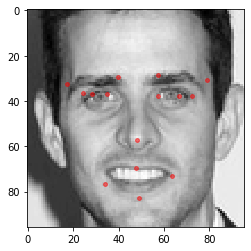

In [75]:
# get the predict result
random_pick = random.randint(0, imgs_test.shape[0])
sample_img = imgs_test[random_pick]
sample_points = pred[random_pick]
plt.imshow(sample_img, cmap='gray')
for index in range(0, sample_points.shape[-1], 2):
    point_x = (sample_points[index]+0.5) *96
    point_y = (sample_points[index+1]+0.5) *96
    plt.scatter(point_x, point_y,s=15,c='red',marker='o',alpha=0.5)